### Learning Outcomes from the Dataset

- **Data Exploration and Pre-processing:** Learn how to analyze and clean data to make it suitable for modeling.  
- **Pipeline Development for Classification:** Build a streamlined process to automate classification tasks efficiently.  
- **Comparison of Metrics and Classifiers:** Understand and evaluate various performance metrics and compare the effectiveness of different classification algorithms.  

The primary goal is to predict whether a credit card client will default on their payment in the following month. The analysis involves using two classifiers—**Random Forest** and **KNN Classifier**—to determine the best-performing model. The optimal hyperparameters will be identified through **grid search** for enhanced predictive accuracy.

In [1]:
## Import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(123)

# Plot figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


### Dataset Overview

The dataset, which is publicly available, can be accessed at the following link:  
[Default of Credit Card Clients Dataset](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients).

The final objective is to build a **classification model** using this dataset to predict whether a credit card client will default on their payment in the following month.

---

### Main Steps:

1. **Data Exploration:**  
   - Investigate the dataset, examine the features, and visualize the data using techniques like histograms and pair plots.  

2. **Data Preprocessing:**  
   - Prepare the data for analysis by creating a complete pipeline to handle missing values, scale features, and encode categorical data if necessary.

3. **Classification and Hyperparameter Tuning:**  
   - Develop models using the following classifiers:  
     a. **Random Forest**  
     b. **K-Nearest Neighbors (KNN)**  

   - Perform **cross-validation** to evaluate the models' performance. Compare the results, document observations, and comment on which classifier performs better.  

---

### Resources:  
- [Random Forest Classifier - Scikit-Learn Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)  
- [K-Nearest Neighbors Classifier - Scikit-Learn Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)  

In [3]:
#Open the downloaded .xl file
#df = pd.read_excel("/path/to/file/default of credit card clients.xls", sheet = 0, skiprows= 1, header = 0)
df_explore=pd.read_excel('default of credit card clients.xls', skiprows=1, header= 0 )


Data exploration studies

Dataset Information

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. 

In [6]:
df_explore.shape

(30000, 25)

In [7]:
df_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

### There are 25 variables:

    ID: ID of each client
    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    SEX: Gender (1=male, 2=female)
    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    MARRIAGE: Marital status (1=married, 2=single, 3=others)
    AGE: Age in years
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
    PAY_2: Repayment status in August, 2005 (scale same as above)
    PAY_3: Repayment status in July, 2005 (scale same as above)
    PAY_4: Repayment status in June, 2005 (scale same as above)
    PAY_5: Repayment status in May, 2005 (scale same as above)
    PAY_6: Repayment status in April, 2005 (scale same as above)
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    default.payment.next.month: Default payment (1=yes, 0=no)


In [8]:
df_explore.index

RangeIndex(start=0, stop=30000, step=1)

In [9]:
df_explore.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Checking the dataset for missing values

In [10]:
df_explore.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64



There is no missing data in the entire dataset.


#### Quantitative Features--Summary Statistics 

In [11]:
df_explore.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


There are 30,000 distinct credit card clients.

The average value for the amount of credit card limit is 167,484. The standard deviation is unusually large, max value being 1M.

Education level is mostly graduate school and university.

Most of the clients are either marrined or single (less frequent the other status).

Average age is 35.5 years, with a standard deviation of 9.2.

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).


### Exploratory Data Analysis

First, we will create four lists containing just the variable names:

#### Target: ['default payment next month']

#### Categorical variables: ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',]

#### Numerical variables: ['LIMIT_BAL', 'AGE',  'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

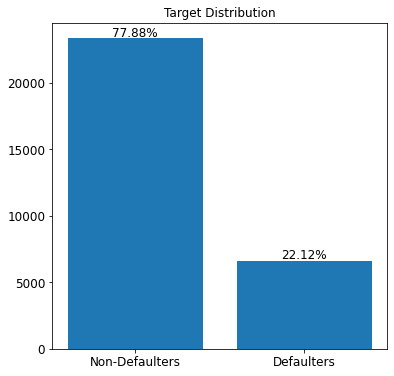

In [12]:
# Percentage of Defaulters and Non-defaulters

target_count = df.groupby('default payment next month').size().reset_index(name='counts')

plt.figure(figsize=(6,6))
plt.bar(target_count['default payment next month'], target_count.counts)
plt.xticks([0,1], labels=["Non-Defaulters", "Defaulters"])
plt.title("Target Distribution")

total = len(df['default payment next month'])
not_def = len(df[df['default payment next month']==0])/total *100
yes_def = len(df[df['default payment next month']==1])/total *100

plt.text(x=0, y=not_def,s=str("%.2f"%not_def+'%'), fontsize=12, position=(0,len(df[df['default payment next month']==0])*1.006), horizontalalignment='center')
plt.text(x=1, y=yes_def,s=str("%.2f"%yes_def+'%'), fontsize=12, position=(1,len(df[df['default payment next month']==1])*1.02), horizontalalignment='center')

plt.show()

We can see that the dataset consists of 77.88% clients are not expected to default payment whereas 22.12% clients are expected to default the payment.

C:\Users\harvi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

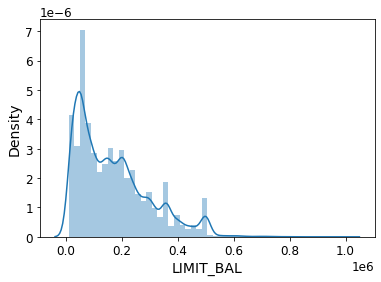

In [13]:
#Limit variable- study the distribuition curve
sns.distplot(df_explore['LIMIT_BAL'])

In [14]:
print (df_explore['LIMIT_BAL'].describe())

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64


<AxesSubplot:xlabel='default payment next month', ylabel='LIMIT_BAL'>

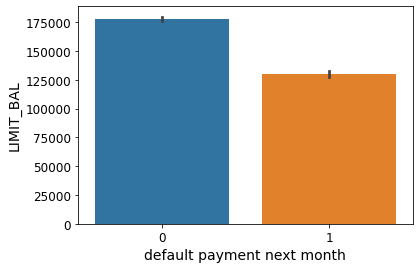

In [15]:
sns.barplot(x='default payment next month', y='LIMIT_BAL', data=df_explore)

It can be found that when the given credit amount is approximately below 150,000, the probability of default is greater than that of nondefault. This shows that when the credit amount is low, there may be more defaulters

Text(0.5, 1.0, 'Defaulters/Non-Defaulters according to Limit balance')

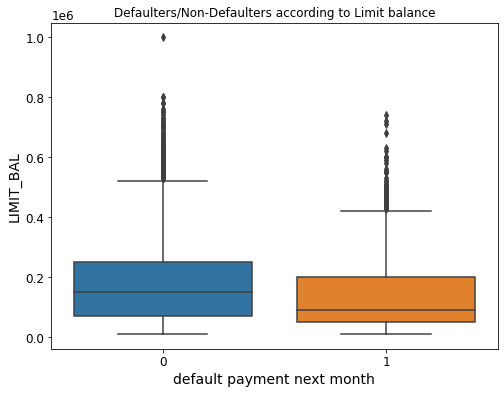

In [16]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x="default payment next month", y="LIMIT_BAL", data=df_explore)
plt.title('Defaulters/Non-Defaulters according to Limit balance')

We have more number of clients having limiting balance between 0 to 200000 currency, with extreme values (maximum) at 1000000. 

#### Categorical variables

In [17]:
#SEX: Gender (1=male, 2=female)
df_explore['SEX'].value_counts()



2    18112
1    11888
Name: SEX, dtype: int64

In [18]:
#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
df_explore['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.


In [19]:
fil = (df_explore['EDUCATION'] == 5) | (df_explore['EDUCATION'] == 6) | (df_explore['EDUCATION'] == 0)
df_explore.loc[fil, 'EDUCATION'] = 4
df_explore['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [20]:
#MARRIAGE: Marital status (1=married, 2=single, 3=others)
df_explore['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

We have few values for 0, which are not determined . So I am adding them in Others category.

In [21]:
fil = df_explore['MARRIAGE'] == 0
df_explore.loc[fil, 'MARRIAGE'] = 3
df_explore['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [22]:
df_explore['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

In [23]:
DF_SEMA=df_explore.copy()
DF_SEMA=DF_SEMA.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others', 5 : 'Unknown', 6 : 'Unknown', 0 : 'Not Provided'},'default payment next month' : {1 : 'Defaulter', 0 : 'Non-Defaulter'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others', 0 : 'Not Provided'}})
DF_SEMA

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Defaulter
1,2,120000,FEMALE,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Defaulter
2,3,90000,FEMALE,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,Non-Defaulter
3,4,50000,FEMALE,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,Non-Defaulter
4,5,50000,MALE,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,Non-Defaulter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,MALE,high school,married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,Non-Defaulter
29996,29997,150000,MALE,high school,single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,Non-Defaulter
29997,29998,30000,MALE,university,single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,Defaulter
29998,29999,80000,MALE,high school,married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,Defaulter


In [24]:
categorical_features1 = ['SEX', 'EDUCATION', 'MARRIAGE']

<Figure size 720x360 with 0 Axes>

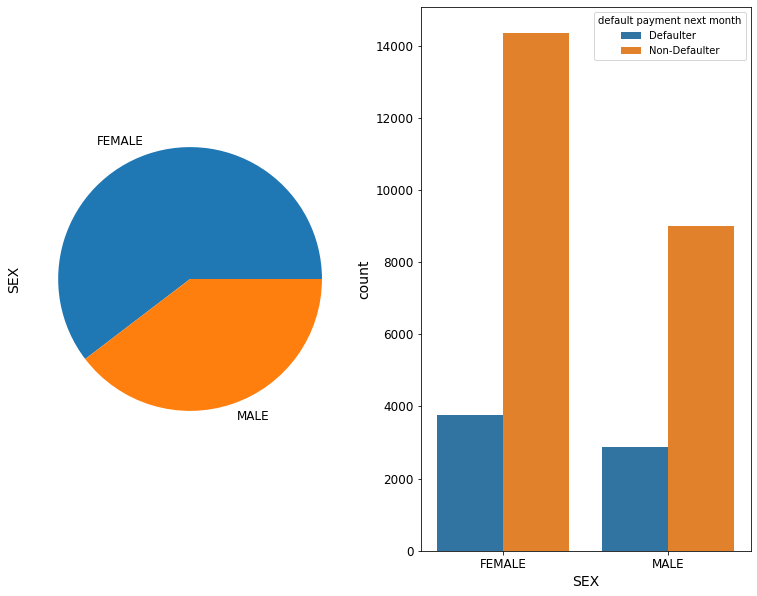

<Figure size 720x360 with 0 Axes>

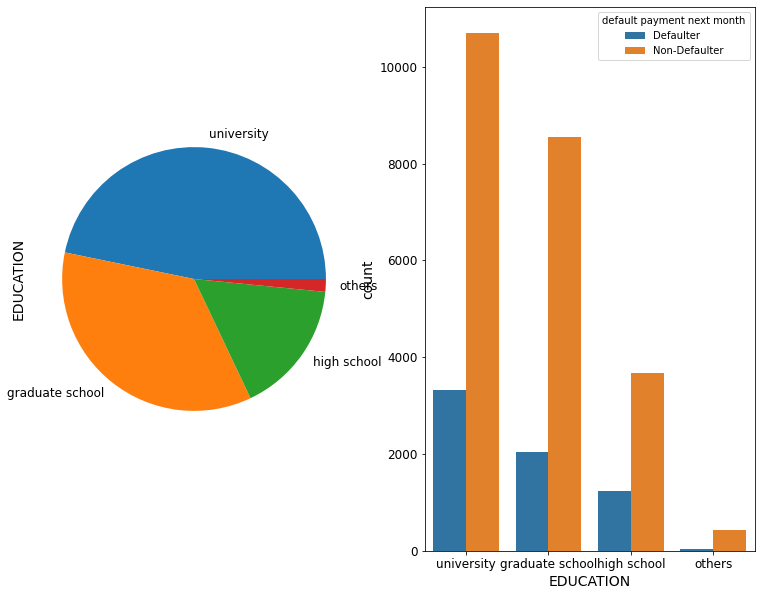

<Figure size 720x360 with 0 Axes>

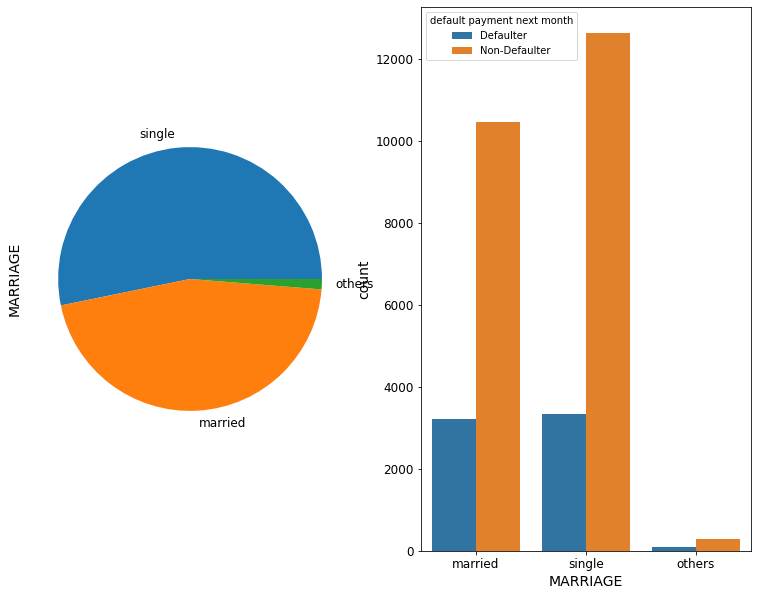

In [25]:
for col in categorical_features1:
    plt.figure(figsize=(10,5))
    fig, axes = plt.subplots(ncols=2,figsize=(13,10))
    DF_SEMA[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
    sns.countplot(x = col, hue = 'default payment next month', data = DF_SEMA)

<Figure size 432x432 with 0 Axes>

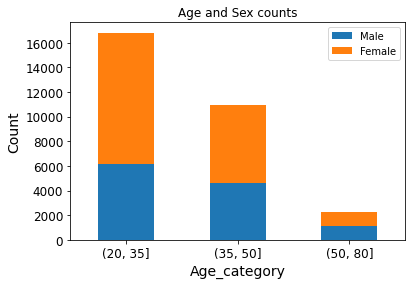

In [26]:
df_explore['Age_category'] = pd.cut(df_explore.AGE, bins=[20,35,50,80])

target_count = df_explore.groupby(['Age_category','SEX']).AGE.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Male', 'Female'])
plt.title("Age and Sex counts")
plt.show()

<Figure size 432x432 with 0 Axes>

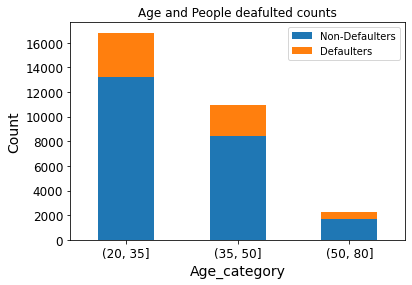

In [27]:
target_count = df_explore.groupby(['Age_category','default payment next month']).AGE.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Non-Defaulters', 'Defaulters'])
plt.title("Age and People deafulted counts")
plt.show()

Nondefault count of age between approximately 25 and 40 is higher, which indicates that consumers in this age group are more capable of repaying credit card loans. This may be because their work and family tend to be stable without too much pressure.

Text(0.5, 1.0, 'Defaulters/Non-Defaulters according to Age')

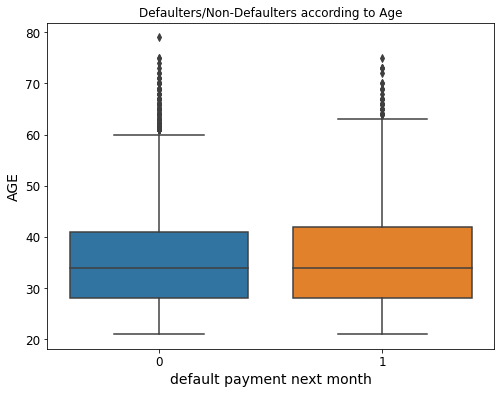

In [28]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x="default payment next month", y="AGE", data=df_explore)
plt.title('Defaulters/Non-Defaulters according to Age')



Below are few observations for categorical features:

    There are more females credit card holder,so no. of defaulter have high proportion of females.
    No. of defaulters have a higher proportion of educated people (graduate school and university)
    No. of defaulters have a higher proportion of Singles.
    The sample set is unbalanced in the corresponding attribute values of the three characteristics of gender, education, and marriage. 



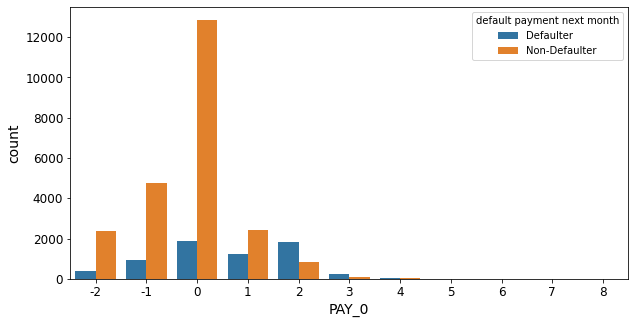

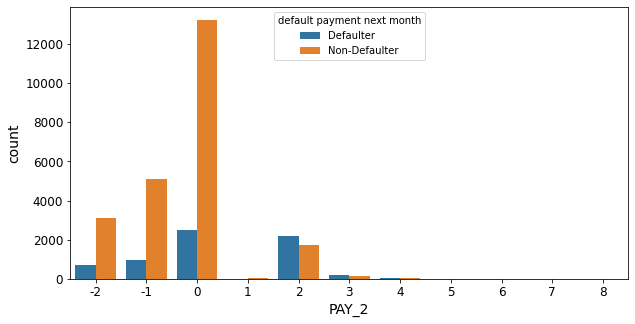

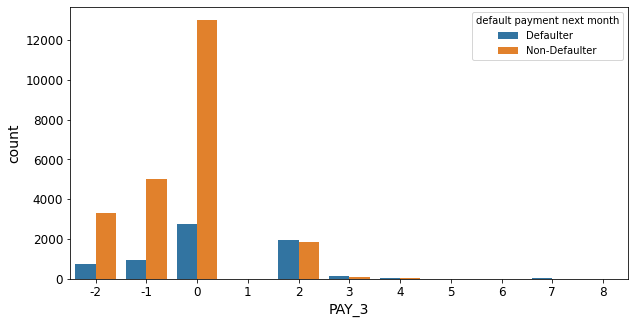

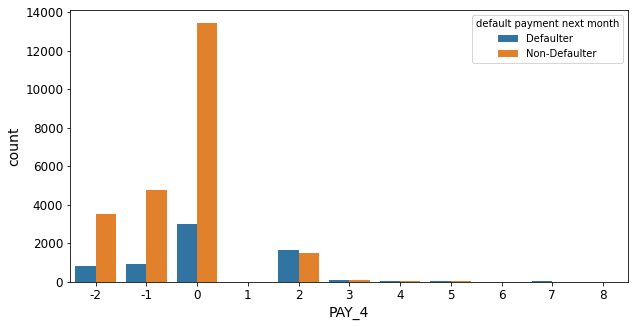

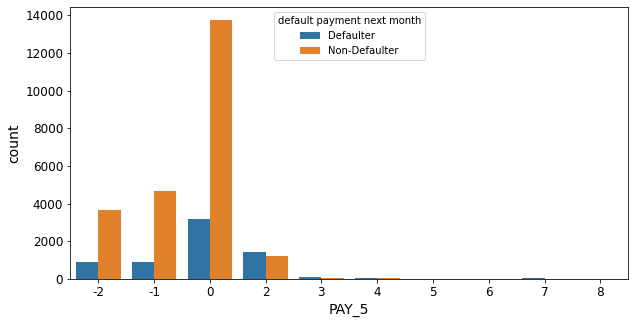

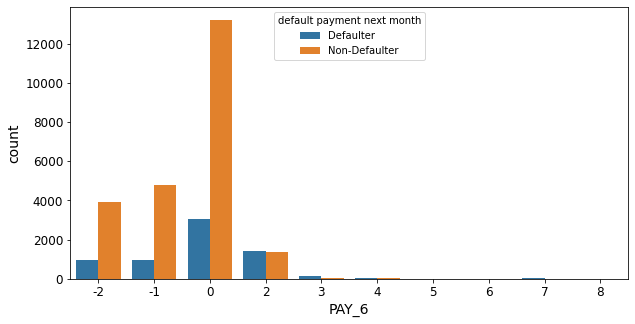

In [29]:
Pay_graphs = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in Pay_graphs:
    plt.figure(figsize=(10,5))
    sns.countplot(x = col, hue = 'default payment next month', data = DF_SEMA)




    It can be seen that consumers who delay payment by one month or less have fewer credit card defaults and almost never happen. In the three months of May, August, and September, for consumers who delayed payment for more than 2 months, the greater the probability of their credit card default is, the more likely it is to increase the loan risk of financial institutions.
   


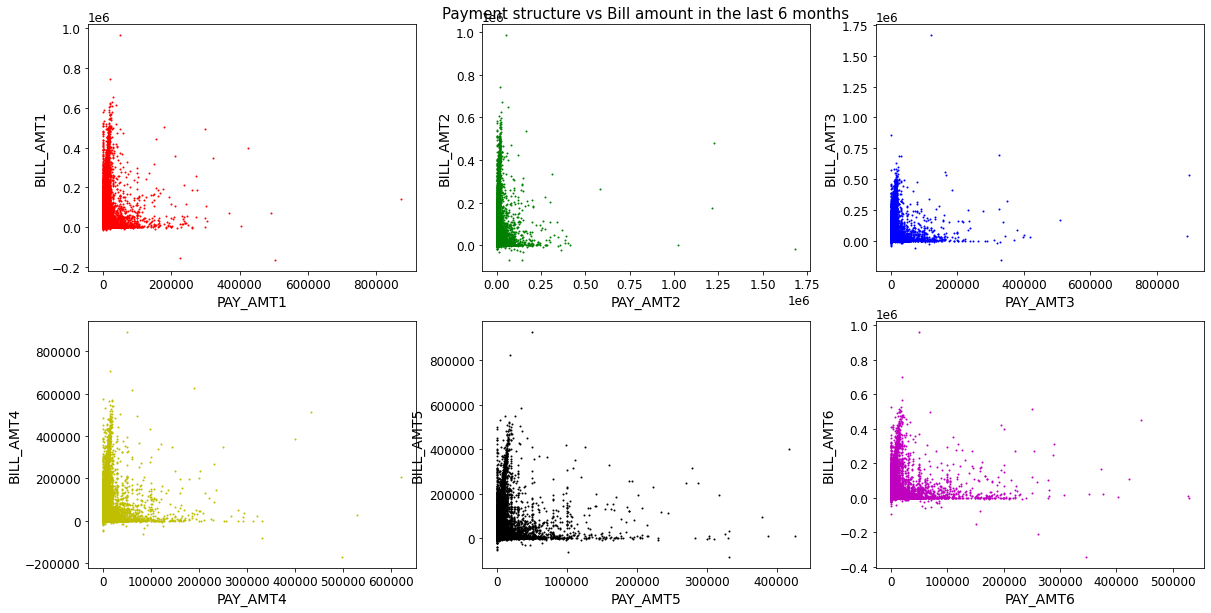

In [30]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=df_explore.PAY_AMT1, y=df_explore.BILL_AMT1, c='r', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')

plt.subplot(232)
plt.scatter(x=df_explore.PAY_AMT2, y=df_explore.BILL_AMT2, c='g', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')
plt.title('Payment structure vs Bill amount in the last 6 months', fontsize=15)

plt.subplot(233)
plt.scatter(x=df_explore.PAY_AMT3, y=df_explore.BILL_AMT3, c='b', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')

plt.subplot(234)
plt.scatter(x=df_explore.PAY_AMT4, y=df_explore.BILL_AMT4, c='y', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=df_explore.PAY_AMT5, y=df_explore.BILL_AMT5, c='black', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=df_explore.PAY_AMT6, y=df_explore.BILL_AMT6, c='m', s=1)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')


plt.show()

Above plot indicates that there is higher proportion of clients for whom the bill amount is high but payment done against the same is very low. This we can infer since maximum number of datapoints are closely packed along the Y-axis near to 0 on X-axis

Correlation Analysis of Categorical features

In [31]:
corr_matrix = df_explore.corr(method='pearson')
#corr_matrix
corr_matrix['default payment next month'].sort_values(ascending=False)

default payment next month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.033842
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
ID                           -0.013952
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.027575
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
LIMIT_BAL                    -0.153520
Name: default payment nex

Correlation Analysis 

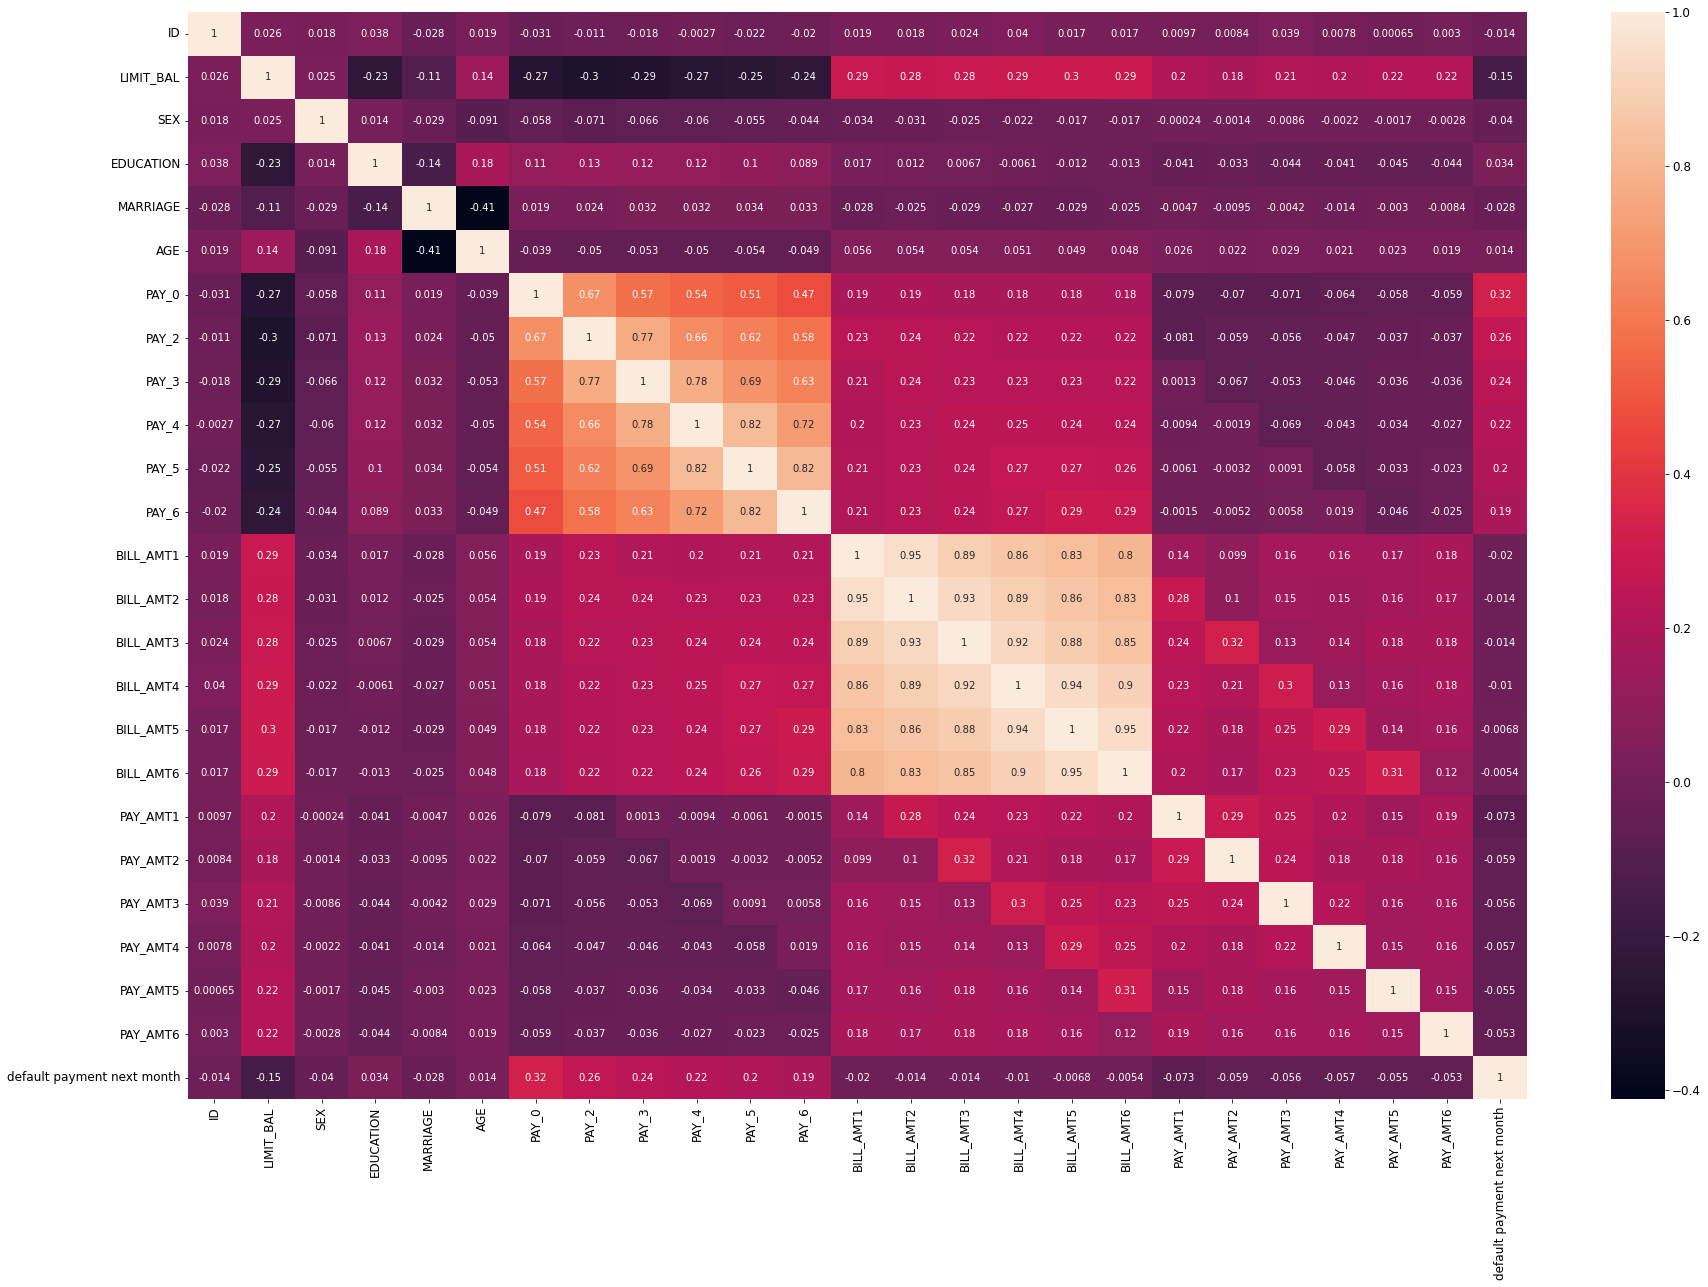

In [32]:
plt.subplots(figsize=(30,20))
sns.heatmap(df_explore.corr(), annot=True)
plt.show()

 There are two parts worth noticing: 1. features correlation with the target variable, 2.highly correlated BILL_ATM(1–6)s, and PAY_(0–6)s.
 
 In the Exploratory Data Analysis section, we established that the target is very imbalanced.

In [33]:
import scipy
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

def rmse(a, b):
    return np.sqrt(np.mean((a-b)**2))
pd.options.display.max_columns = None
# to make this notebook's output identical at every run
np.random.seed(123)

#### Preprocessing pipelines

The variables have been grouped into different categories based on dependent, categorical and numerical variables

In [34]:
Dep_var = ['default payment next month']
Categorical_var = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',]
Numerical_var = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

Here are the transformation pipelines---Since the values are numerical in categorical variables, therefore we need to convert the values into matrix by using one hot encoding. The numerical variables had large variations in min and max values, therefore, scaler has to be used. Since the dataset didnt have any missing values, hence inputer has not been used in this dataset.

#### Transforers used: One-Hot encoding and MinMaxScaler

In [35]:
# Categorical -  one hot encode

cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, Categorical_var)]

# Numerical -  scalenum_si_step 
num_scl_step = ('scl', MinMaxScaler())
num_steps = [num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, Numerical_var)]

In [36]:
ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(df_explore[Categorical_var + Numerical_var])
X = ct.transform(df_explore[Categorical_var + Numerical_var]) 

y = df[['default payment next month']].values

#### Train-Test split- Set the random seed to 123 (For splitting or any other random algorithm)
    Split data into training (80%) and testing (20%)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24000, 87) (6000, 87) (24000, 1) (6000, 1)


Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns

RFC1 = RandomForestClassifier()
RFC1.fit(X_train, np.ravel(y_train))
y_pred = RFC1.predict(X_test)
# Get the predicted classes
train_class_preds = RFC1.predict(X_train)
test_class_preds = RFC1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.818


In [39]:
def display_results(model, X, y):
    print("RMSE:", rmse(model.predict(X), y))
    print("Predicted 1-5:", model.predict(X_test[0:5]))
    print("Actual 1-5:", y_test[0:5, 0])
    
display_results(RFC1, X, y)

RMSE: 0.578604459021878
Predicted 1-5: [0 0 1 0 0]
Actual 1-5: [0 0 1 1 0]


Cross-validation with 5-folds--Random Forest Classifier

In [40]:
#Accuracy
scores = cross_val_score(RFC1, X, np.ravel(y), cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.81 accuracy with a standard deviation of 0.01


In [41]:
#RMSE
scores = cross_val_score(RFC1, X, np.ravel(y), cv=5, scoring='neg_mean_squared_error')
np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", np.sqrt(-scores))
    print("Mean:", np.sqrt(-scores).mean())
    print("Standard deviation:", np.sqrt(-scores).std())

display_scores(scores)


Scores: [0.44328321 0.43684475 0.42563678 0.41412558 0.4228869 ]
Mean: 0.4285554437959761
Standard deviation: 0.010339161450555094


KNN Model

In [42]:
from sklearn.neighbors import KNeighborsClassifier  
Knn= KNeighborsClassifier()  
#y=np.ravel(y)
Knn.fit(X_train, np.ravel(y_train))
y_pred_K = Knn.predict(X_test)

# Get the predicted classes
train_class_preds = Knn.predict(X_train)
test_class_preds = Knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_K))

Accuracy: 0.7985


In [43]:
scores_K = cross_val_score(Knn, X, np.ravel(y), cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_K.mean(), scores_K.std()))

0.80 accuracy with a standard deviation of 0.01


In [44]:
scores = cross_val_score(Knn, X, np.ravel(y), cv=5, scoring='neg_mean_squared_error')
np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", np.sqrt(-scores))
    print("Mean:", np.sqrt(-scores).mean())
    print("Standard deviation:", np.sqrt(-scores).std())

display_scores(scores)

Scores: [0.45952874 0.46169976 0.45074013 0.43358967 0.44684076]
Mean: 0.45047981283962396
Standard deviation: 0.010063377033117618


### Results of CrossValidation in RFC and KNN Models:
of the two models used, Cross Validation in Random Forest Classifier Model gives Mean accuracy as 0.43; while CV in KNN gives mean=0.45.Cross-validation gives confidence in the calculation of performance metrics.Cross-validation has been used to avoid data selection bias and get the “real” accuracy scores for how well our model fits the training and testing partition. This would solve the problem of overfitting. If one model overfits the training data, it would perform fantastic in the training dataset but very poorly on the testing data. Thus a large difference in the two accuracy score would indicate the model is overfitting, otherwise, it is not. 

ROC Curve and Threshold values:

Random forest Classifier---Now, we can create the random forest model.

In [45]:
RFC1 = RandomForestClassifier()
RFC1.fit(X_train, np.ravel(y_train))
y_pred = RFC1.predict(X_test)
print("=== Confusion Matrix of RFC===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report of RFC ===")
print(classification_report(y_test, y_pred))


=== Confusion Matrix of RFC===
[[4395  301]
 [ 810  494]]


=== Classification Report of RFC ===
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4696
           1       0.62      0.38      0.47      1304

    accuracy                           0.81      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.80      0.81      0.80      6000



<AxesSubplot:>

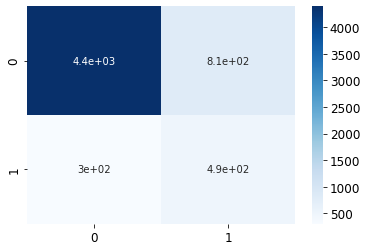

In [46]:
cm_RFC1= confusion_matrix(y_pred, y_test) 
sns.heatmap(cm_RFC1, annot=True, cmap='Blues')

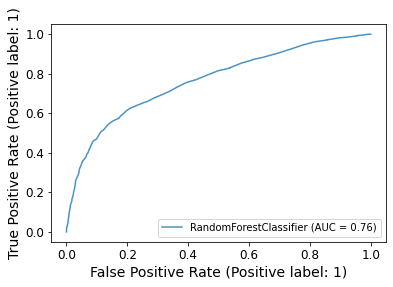

In [47]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(RFC1, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

#### Calculation of Threshold value for Random Forest Classifier

Threshold value is: 0.27


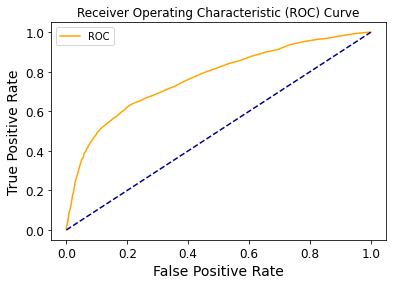

In [48]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import statsmodels.api as sm
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

RFC1 = RandomForestClassifier()
RFC1.fit(X_train, np.ravel(y_train))
y_pred = RFC1.predict(X_test)


y_proba = RFC1.predict_proba(X_test)
# compute FPR and TPR from y test set and predicted probabilities
fpr, tpr, thresholds = roc_curve(
    y_test, y_proba[:,1], drop_intermediate=False)
# compute ROC AUC
roc_auc = auc(fpr, tpr)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)


Area under the ROC curve : 0.769380


[Text(-20.0, 0, ''),
 Text(0.0, 0, ''),
 Text(20.0, 0, ''),
 Text(40.0, 0, ''),
 Text(60.0, 0, ''),
 Text(80.0, 0, ''),
 Text(100.0, 0, ''),
 Text(120.0, 0, ''),
 Text(140.0, 0, ''),
 Text(160.0, 0, ''),
 Text(180.0, 0, '')]

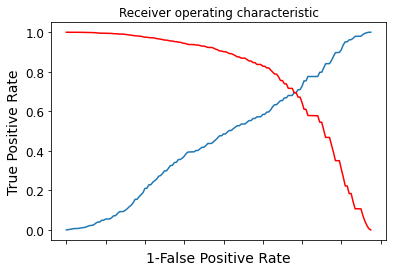

In [49]:
import pylab as pl
# fpr, tpr, thresholds =roc_curve(data['admit'], data['pred'])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

KNN Classifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier  
Knn= KNeighborsClassifier()  
y=np.ravel(y)
Knn.fit(X_train, np.ravel(y_train))
y_pred = Knn.predict(X_test)

In [51]:
print("=== Confusion Matrix in KNN===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report of KNN ===")
print(classification_report(y_test, y_pred))


=== Confusion Matrix in KNN===
[[4316  380]
 [ 829  475]]


=== Classification Report of KNN ===
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4696
           1       0.56      0.36      0.44      1304

    accuracy                           0.80      6000
   macro avg       0.70      0.64      0.66      6000
weighted avg       0.78      0.80      0.78      6000



<AxesSubplot:>

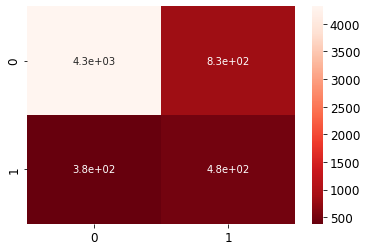

In [52]:
cm_Knn= confusion_matrix(y_pred, y_test) 
sns.heatmap(cm_Knn, annot=True, cmap='Reds_r')


The confusion matrix is useful for giving false positives and false negatives. The classification report tells us the accuracy of our model. The ROC curve plots out the true positive rate versus the false positive rate at various thresholds. The roc_auc scoring used in the cross-validation model shows the area under the ROC curve.

We’ll evaluate our model’s score based on the roc_auc score, which is 0.765 for Random Forest Classifier and 0.701 for KNN model. The next thing we should do is tune our hyperparameters to see if we can improve the performance of the model.


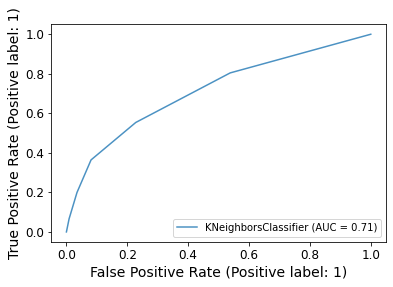

In [53]:
Knn.fit(X_train, np.ravel(y_train))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(Knn, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

#### Calculation of Threshold value for KNN model

Threshold value is: 0.4


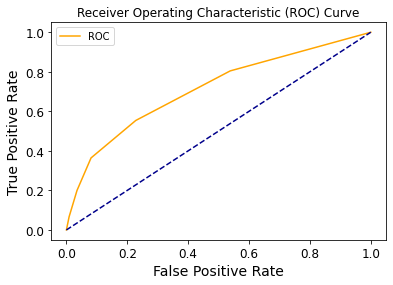

In [54]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

Knn= KNeighborsClassifier()  
Knn.fit(X_train, np.ravel(y_train))
y_pred = Knn.predict(X_test)

y_proba = Knn.predict_proba(X_test)
# compute FPR and TPR from y test set and predicted probabilities
fpr, tpr, thresholds = roc_curve(
    y_test, y_proba[:,1], drop_intermediate=False)
# compute ROC AUC
roc_auc = auc(fpr, tpr)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)


Area under the ROC curve : 0.711607


[Text(-1.0, 0, ''),
 Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, ''),
 Text(6.0, 0, ''),
 Text(7.0, 0, '')]

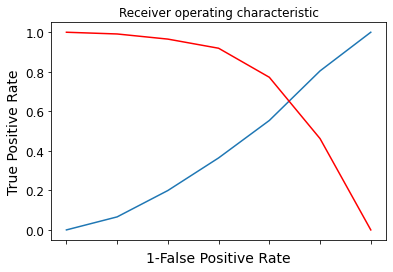

In [55]:
import pylab as pl
# fpr, tpr, thresholds =roc_curve(data['admit'], data['pred'])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

### Results of ROC Curve, AUC, and Threshold value:
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

    True Positive Rate
    False Positive Rate

The area under the ROC curve tells us how well the model separates the different classes in the dataset. It plots true positive rate against false positive rate.

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

Random Forest Classifier: 

We’re calculating the area between the orange curved line and blue dotted line. This area is a number between 0 and 1, zero meaning the model predicted all of the data incorrectly, and one meaning the model predicted all of the data correctly. The more that the curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.To quantify this, we can calculate the AUC – area under the curve – which tells us how much of the plot is located under the curve.

Our model is pretty good at AUC = 0.7747 and Threshold value= 0.25.
KNN model:  Our KNN model has given AUC = 0.71 and Threshold value= 0.4.
As we can see from the values and plots above, both the models have done a pretty poor job of classifying the data into categories.

At the end of the day, having the ability to predict 95% (recall score) of potential defaults would save a-lot of money on credit card charge-offs. This modeling process is a step in the right direction.


Random Forest model using GridSearchCV - tune only: n_estimators: {4, 5, 10, 20, 50}, CV=5, scoring=roc_auc

#### Tuning Hyperparameters

#### GridSearchCV: We’ll use RandomizedSearchCV from sklearn to optimize our hyperparamaters.

We use Gridsearch cross validation to obtain the best random forest model and with it we make predictions of the test data.

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
param_grid = {'n_estimators': [4, 5, 10, 20, 50]}
RFC1 = RandomForestClassifier()    

# we pass the model, our parameter grid, and cross-validation parameters to the class
grid_search = GridSearchCV(estimator=RFC1, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=2, n_jobs = -1)
# Fit the model
grid_search.fit(X=X, y=np.ravel(y))
# print results


Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [4, 5, 10, 20, 50]}, scoring='roc_auc',
             verbose=2)

In [57]:
print(grid_search.best_params_)
print("\n",grid_search.best_estimator_)
print("\n",grid_search.best_score_)

{'n_estimators': 50}

 RandomForestClassifier(n_estimators=50)

 0.7574356934456457


#### Best parameter: {'n_estimators': 50} in RandomForestClassifier(n_estimators=50)



Now we will make a Random Forest Classifier with the best values of the hyperparameters. Then we will plot the ROC curve.



In [58]:
final_model = grid_search.best_estimator_
display_results(final_model, X_test, y_test)

RMSE: 0.5828619047424527
Predicted 1-5: [0 0 1 1 0]
Actual 1-5: [0 0 1 1 0]


#### Cross-Validation in RandomForestClassifier(n_estimators=50)

In [59]:
scores = cross_val_score(final_model, X, np.ravel(y), cv=5, scoring='neg_mean_squared_error')
display_scores(scores)

Scores: [0.44328321 0.43798782 0.42720019 0.41852917 0.42680987]
Mean: 0.4307620516303019
Standard deviation: 0.008797056813870446


In [60]:
scores = cross_val_score(final_model, X, np.ravel(y), cv=5, scoring='roc_auc')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.76 accuracy with a standard deviation of 0.02


=== Confusion Matrix ===
[[4416  280]
 [ 817  487]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4696
           1       0.63      0.37      0.47      1304

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000





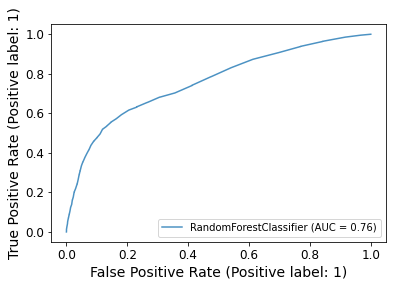

In [61]:

RFC2 = RandomForestClassifier(n_estimators=50)
#y_train=np.ravel(y_train)
RFC2.fit(X_train, np.ravel(y_train))
y_pred = RFC2.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(RFC2, X_test, y_test, ax=ax, alpha=0.8)
plt.show()


<AxesSubplot:>

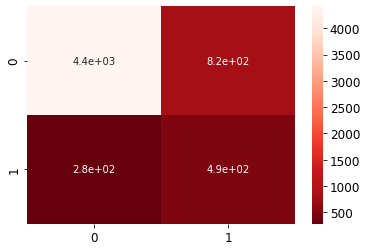

In [62]:
cm= confusion_matrix(y_pred, y_test) 
sns.heatmap(cm, annot=True, cmap='Reds_r')

#### KNN Classification

#### KNN model with hyperparameter tuning with n=n_neighbors: {3, 5, 10, 20} and cv=5

In [63]:
param_grid = {'n_neighbors': [3, 5, 10, 20]}
Knn= KNeighborsClassifier()  
grid_search = GridSearchCV(estimator=Knn, param_grid=param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X=X, y=np.ravel(y))

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 20]}, scoring='roc_auc')

In [64]:
print(grid_search.best_params_)
print("\n",grid_search.best_estimator_)
print("\n",grid_search.best_score_)

{'n_neighbors': 20}

 KNeighborsClassifier(n_neighbors=20)

 0.7444905422123528


#### Best parameter chosen as n=20

#### Results of tuning of hyperparameters:

Hyperparameter tuning using GridSearchCV is the next step towards increasing the performance of our RandomForestClassifier. GridSearchCV from sklearn already allows you to search through potential parameter combinations and find the best one. It accomplishes this by splitting the train data into different stratified cv folds. Then fitting one parameter combo 5 times each (in this case cv=5 to speed up tuning) and taking the average ‘score’ to compare performance across different combinations.

The best parameter from the given parameters in Random Forest Classifier (n_estimators: {4, 5, 10, 20, 50} was observed to be 50.
The best parameter from the given parameters in KNN Classifier  n_neighbors: {3, 5, 10, 20} was observed to be 20.







Now, let's grab our best model and do some performance testing. First, on our original test set, and then with our cross-validation methodology. Here the output will show the accuracy ( RMSE
 ) of the best model, as well as a sample of five predicted and actual scores.

#### Cross-Validation with {'n_neighbors': 20} in KNeighborsClassifier(n_neighbors=20)

In [65]:
final_model = grid_search.best_estimator_
display_results(final_model, X_test, y_test)

RMSE: 0.5302980294136497
Predicted 1-5: [0 0 1 0 0]
Actual 1-5: [0 0 1 1 0]


In [66]:
scores = cross_val_score(final_model, X, np.ravel(y), cv=5, scoring='neg_mean_squared_error')
display_scores(scores)

Scores: [0.44497191 0.43588989 0.42544095 0.4173328  0.42051556]
Mean: 0.4288302217488126
Standard deviation: 0.010229414199464344


In [67]:
scores = cross_val_score(final_model, X, np.ravel(y), cv=5, scoring='roc_auc')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.74 accuracy with a standard deviation of 0.01


=== Confusion Matrix ===
[[4456  240]
 [ 866  438]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4696
           1       0.65      0.34      0.44      1304

    accuracy                           0.82      6000
   macro avg       0.74      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000





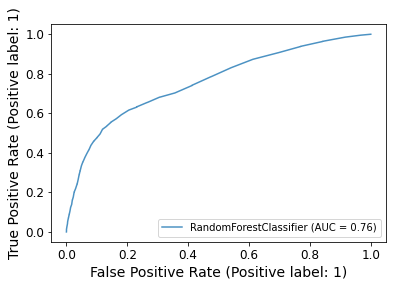

In [68]:
Knn= KNeighborsClassifier(n_neighbors=20)  
#Knn.fit(X=X, y=np.ravel(y))
Knn.fit(X_train, np.ravel(y_train))
y_pred = Knn.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(RFC2, X_test, y_test, ax=ax, alpha=0.8)
plt.show()


we learned about transformers, Pipelines, K-fold Cross-Validation, GridSearchCV used for ML studies. GridSearchCV is a model selection step and this should be done after Data Processing tasks. It is always good to compare the performances of Tuned and Untuned Models. This will cost us the time and expense but will surely give us the best results. The scikit-learn API is a great resource in case of any help. It’s always good to learn by doing.

#### Results of Crossvalidation with RFC+tuned parameters(n_estimates=50) and KNN+Tuned parameters(n=20) 
The AUC is 
The intent of the ROC Curve is to show how well the model works for every possible threshold, as a relation of TPR vs FPR. So basically to plot the curve we need to calculate these variables for each threshold and plot it on a plane.

RCF: Before tuning, the AUC was 0.77 and after tuning with n_estimates=50, AUC was 0.76.
KNN: Before tuning, the AUC was 0.71, and after tuning with n_neighbours=20, AUC was 0.75.
But Random Forest Classifier had better confusion matrix and better recall for 'defaulters' than KNN. 
